### Import the libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

In [2]:
data = pd.read_csv("/content/NF-ToN-IoT.csv")
data.head()

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack
0,192.168.1.195,63318,52.139.250.253,443,6,91.00,181.0,165.0,2.0,1.0,24.0,327.0,0.0,Benign
1,192.168.1.79,57442,192.168.1.255,15600,17,0.00,63.0,0.0,1.0,0.0,0.0,0.0,0.0,Benign
2,192.168.1.79,57452,239.255.255.250,15600,17,0.00,63.0,0.0,1.0,0.0,0.0,0.0,0.0,Benign
3,192.168.1.193,138,192.168.1.255,138,17,10.16,472.0,0.0,2.0,0.0,0.0,0.0,0.0,Benign
4,192.168.1.79,51989,192.168.1.255,15600,17,0.00,63.0,0.0,1.0,0.0,0.0,0.0,0.0,Benign


In [3]:
len(data)

58004

In [4]:
data.columns

Index(['IPV4_SRC_ADDR', 'L4_SRC_PORT', 'IPV4_DST_ADDR', 'L4_DST_PORT',
       'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'OUT_BYTES', 'IN_PKTS', 'OUT_PKTS',
       'TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS', 'Label', 'Attack'],
      dtype='object')

In [5]:
data.dropna(subset=['Attack'], inplace=True)

In [6]:
data['Attack'].unique()

array(['Benign', 'dos', 'injection', 'ddos', 'scanning', 'password',
       'mitm'], dtype=object)

In [7]:
data['Attack'].value_counts()

Attack
injection    26130
password     11915
ddos         10708
Benign        5457
scanning      3265
dos            522
mitm             6
Name: count, dtype: int64

## Without Pre-processing

In [8]:
X = data.drop(['Attack', 'IPV4_SRC_ADDR', 'IPV4_DST_ADDR'], axis=1)
y = data.loc[:, 'Attack']
X.head()

,L4_SRC_PORT,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label
0,63318,443,6,91.00,181.0,165.0,2.0,1.0,24.0,327.0,0.0
1,57442,15600,17,0.00,63.0,0.0,1.0,0.0,0.0,0.0,0.0
2,57452,15600,17,0.00,63.0,0.0,1.0,0.0,0.0,0.0,0.0
3,138,138,17,10.16,472.0,0.0,2.0,0.0,0.0,0.0,0.0
4,51989,15600,17,0.00,63.0,0.0,1.0,0.0,0.0,0.0,0.0


### Model Creation

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

### Different Model with Evalaution Metrics and Visualization

In [10]:
model=LogisticRegression(random_state=0)
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [11]:
conf_matrix = confusion_matrix(model.predict(x_train), y_train)
accuracy = accuracy_score(model.predict(x_train), y_train)
precision = precision_score(model.predict(x_train), y_train, average='weighted')
recall = recall_score(model.predict(x_train), y_train, average='weighted')
f1 = f1_score(model.predict(x_train), y_train,average='weighted')
# Print results
print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix:
[[ 3682     0     0    10     0     4     3]
 [    0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0]
 [ 1173  9586   467 23411     5 10685  2945]
 [    0     0     0     0     0     0     0]
 [   38    55     0    73     0    57     8]
 [    0     0     0     0     0     0     0]]

Accuracy: 0.5200950155166468
Precision: 0.974794067006246
Recall: 0.5200950155166468
F1 Score: 0.6640862304901313


In [12]:
# Train the model
model1 = GaussianNB().fit(x_train, y_train)
# Make predictions
y_pred = model1.predict(x_test)

In [13]:
# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy1 = accuracy_score(y_test, y_pred)
precision1 = precision_score(y_test, y_pred, average='weighted')
recall1 = recall_score(y_test, y_pred, average='weighted')
f11 = f1_score(y_test, y_pred, average='weighted')
# Print results
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy:", accuracy1)
print("Precision:", precision1)
print("Recall:", recall1)
print("F1 Score:", f11)

Confusion Matrix:
[[ 432   14   85    3   30    0    0]
 [   1  990   66   10    0    0    0]
 [   0    0   53    0    2    0    0]
 [   7 1841   48  738    2    0    0]
 [   0    0    1    0    0    0    0]
 [   0 1117    1   51    0    0    0]
 [   1  297    5    6    0    0    0]]

Classification Report:
              precision    recall  f1-score   support

      Benign       0.98      0.77      0.86       564
        ddos       0.23      0.93      0.37      1067
         dos       0.20      0.96      0.34        55
   injection       0.91      0.28      0.43      2636
        mitm       0.00      0.00      0.00         1
    password       0.00      0.00      0.00      1169
    scanning       0.00      0.00      0.00       309

    accuracy                           0.38      5801
   macro avg       0.33      0.42      0.29      5801
weighted avg       0.55      0.38      0.35      5801


Accuracy: 0.3814859506981555
Precision: 0.5549735038158589
Recall: 0.3814859506981555
F1 Scor

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

In [14]:
# Initialize the classifier with random_state=0
mlp1 = MLPClassifier(random_state=0)
# Fit the classifier to the training data
mlp1.fit(x_train, y_train)

MLPClassifier(random_state=0)

In [15]:
accuracy2 = accuracy_score(mlp1.predict(x_train), y_train)
print("Accuracy:",accuracy2)
y_pred = mlp1.predict(x_test)
precision2 = precision_score(y_test, y_pred, average='weighted')
recall2 = recall_score(y_test, y_pred, average='weighted')
f12 = f1_score(y_test, y_pred, average='weighted')
print("Precision:", precision2)
print("Recall:", recall2)
print("F1-score:", f12)

Accuracy: 0.5315122025976017
Precision: 0.3140600977381578
Recall: 0.5392173763144286
F1-score: 0.38978815228355124


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


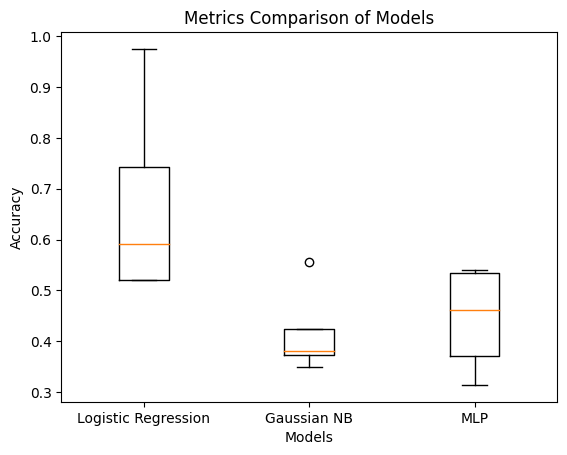

In [16]:
# Visualize accuracy scores
models = ['Logistic Regression', 'Gaussian NB', 'MLP']
accuracies = [
    [accuracy, precision, recall, f1],  # Logistic Regression accuracies
    [accuracy1, precision1, recall1, f11],  # Gaussian NB accuracies
    [accuracy2, precision2, recall2, f12]   # MLP accuracies
]
import matplotlib.pyplot as plt
plt.boxplot(accuracies, labels=models)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Metrics Comparison of Models')
# Display the plot
plt.show()

### Features contribution in the model

In [17]:
print("Features contributing to the model:")
for i, class_label in enumerate(model.classes_):
    print(f"\nClass: {class_label}")
    print("Means:")
    class_means = x_train[y_train == class_label].mean().sort_values(ascending=False)
    print(class_means)  # Mean for each feature in this class
    print("Variances:")
    class_variances = x_train[y_train == class_label].var().sort_values(ascending=False)
    print(class_variances)  # Variance for each feature in this class

Features contributing to the model:

Class: Benign
Means:
L4_SRC_PORT                   34734.391375
L4_DST_PORT                   18983.474555
OUT_BYTES                      5010.909258
FLOW_DURATION_MILLISECONDS     1995.340282
IN_BYTES                       1691.142040
L7_PROTO                         21.560778
PROTOCOL                         11.617208
TCP_FLAGS                        11.189250
OUT_PKTS                          6.370529
IN_PKTS                           5.718986
Label                             0.000000
dtype: float64
Variances:
OUT_BYTES                     4.898025e+09
L4_SRC_PORT                   5.316398e+08
L4_DST_PORT                   4.623163e+08
IN_BYTES                      1.683150e+08
FLOW_DURATION_MILLISECONDS    1.314545e+08
OUT_PKTS                      2.827986e+03
L7_PROTO                      1.777049e+03
IN_PKTS                       8.275933e+02
TCP_FLAGS                     1.635206e+02
PROTOCOL                      3.234792e+01
Label        

### Ablation Analysis

In [18]:
# Perform ablation analysis
removed_features = []
scores = []

for feature in X.columns:
    # Remove the current feature
    reduced_features = X.drop(feature, axis=1)

    x_train, x_test, y_train, y_test = train_test_split(reduced_features, y, test_size=0.1)

    # Train a new model without the feature
    model = LogisticRegression(random_state=0)
    model.fit(x_train, y_train)

    # Evaluate the model without the feature
    score = accuracy_score(y_test, model.predict(x_test))
    scores.append(score)

    # Store the removed feature
    removed_features.append(feature)

# Create a dataframe with results
results_df = pd.DataFrame({"Feature Removed": removed_features, "Accuracy Score": scores})

# Print the results
print("Ablation Analysis Results:")
print(results_df.to_string())

# Compare the original and reduced model performance
print("Reduced Model Accuracy Range:", min(scores), "-", max(scores))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Ablation Analysis Results:
               Feature Removed  Accuracy Score
0                  L4_SRC_PORT        0.503189
1                  L4_DST_PORT        0.470953
2                     PROTOCOL        0.526461
3                     L7_PROTO        0.522841
4                     IN_BYTES        0.523875
5                    OUT_BYTES        0.519566
6                      IN_PKTS        0.528357
7                     OUT_PKTS        0.528702
8                    TCP_FLAGS        0.524565
9   FLOW_DURATION_MILLISECONDS        0.518187
10                       Label        0.516807
Reduced Model Accuracy Range: 0.4709532839165661 - 0.5287019479400104


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


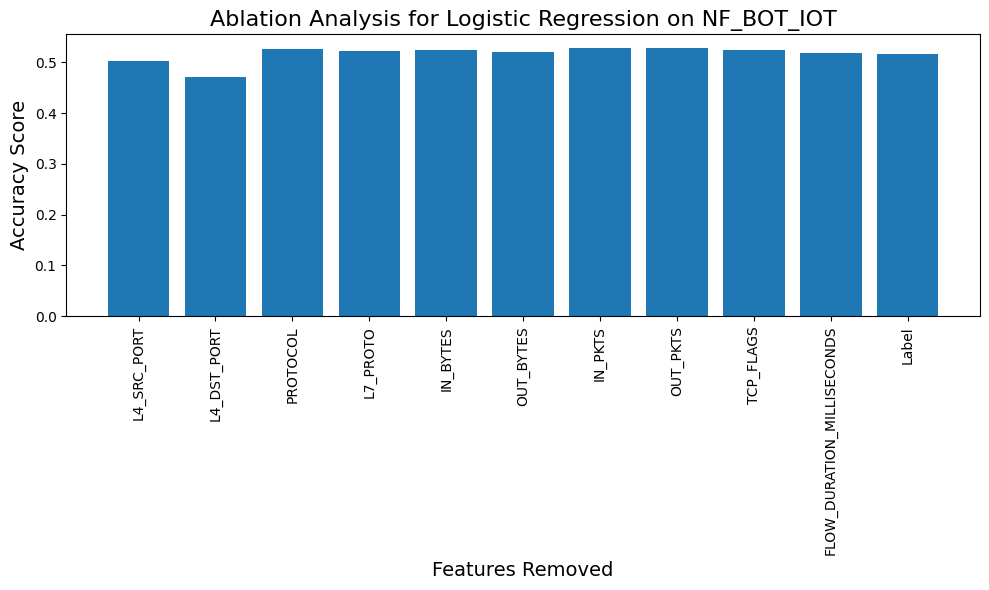

In [19]:
# Prepare data
features = results_df["Feature Removed"]
scores = results_df["Accuracy Score"]

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(features, scores)

# Add labels and title
plt.xlabel("Features Removed", fontsize=14)
plt.ylabel("Accuracy Score", fontsize=14)
plt.title("Ablation Analysis for Logistic Regression on NF_BOT_IOT", fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

## With Preprocessing

### Load the data

In [20]:
data = pd.read_csv("/content/NF-ToN-IoT.csv")
data.head()

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack
0,192.168.1.195,63318,52.139.250.253,443.0,6.0,91.00,181.0,165.0,2.0,1.0,24.0,327.0,0.0,Benign
1,192.168.1.79,57442,192.168.1.255,15600.0,17.0,0.00,63.0,0.0,1.0,0.0,0.0,0.0,0.0,Benign
2,192.168.1.79,57452,239.255.255.250,15600.0,17.0,0.00,63.0,0.0,1.0,0.0,0.0,0.0,0.0,Benign
3,192.168.1.193,138,192.168.1.255,138.0,17.0,10.16,472.0,0.0,2.0,0.0,0.0,0.0,0.0,Benign
4,192.168.1.79,51989,192.168.1.255,15600.0,17.0,0.00,63.0,0.0,1.0,0.0,0.0,0.0,0.0,Benign


### Model Creation

In [21]:
data.dropna(subset=['Attack'], inplace=True)

In [22]:
print("Data Shape:", data.shape)

def check_null(data):
    for i in data.isnull().sum():
        if data.isnull().sum()[i]!=0:
            return print("Data contains Null values.")
    return print("Data is Clean of Null values.")


def check_NA(data):
    for i in data.isna().sum():
        if data.isna().sum()[i]!=0:
            return print("Data contains Null.")
    return print("Data is Clean of NA.")

Data Shape: (144751, 14)


In [23]:
check_null(data)
check_NA(data)

Data is Clean of Null values.
Data is Clean of NA.


In [24]:
print(data.duplicated().sum(), "fully duplicate rows to remove")
data.drop_duplicates(inplace=True)
data.reset_index(inplace=True, drop=True)
data.shape

188 fully duplicate rows to remove


(144563, 14)

In [25]:
X = data.drop(['Attack', 'IPV4_SRC_ADDR', 'IPV4_DST_ADDR', 'L4_SRC_PORT', 'L4_DST_PORT'], axis=1)
y = data.loc[:, 'Attack']
X.head()

,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label
0,6.0,91.00,181.0,165.0,2.0,1.0,24.0,327.0,0.0
1,17.0,0.00,63.0,0.0,1.0,0.0,0.0,0.0,0.0
2,17.0,0.00,63.0,0.0,1.0,0.0,0.0,0.0,0.0
3,17.0,10.16,472.0,0.0,2.0,0.0,0.0,0.0,0.0
4,17.0,0.00,63.0,0.0,1.0,0.0,0.0,0.0,0.0


In [26]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

### Normalization

In [27]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_sc = sc.fit_transform(x_train)
X_test_sc = sc.transform(x_test)

### Different Model with Evalaution Metrics and Visualization

In [30]:
model=LogisticRegression(random_state=0)
model.fit(X_train_sc, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [31]:
conf_matrix = confusion_matrix(model.predict(X_train_sc), y_train)
accuracy = accuracy_score(model.predict(X_train_sc), y_train)
precision = precision_score(model.predict(X_train_sc), y_train, average='weighted')
recall = recall_score(model.predict(X_train_sc), y_train, average='weighted')
f1 = f1_score(model.predict(X_train_sc), y_train,average='weighted')
# Print results
print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix:
[[ 8829     0     0     0     0     0     0]
 [    0  2239  1001  2305     6   974   275]
 [    0     0     0     0     0     0     0]
 [    0 21761   108 58517     2 26588  5914]
 [    0     0     0     0     0     0     0]
 [    0   333     0   651     0   512    91]
 [    0     0     0     0     0     0     0]]

Accuracy: 0.5387683888521667
Precision: 0.8988455490092421
Recall: 0.5387683888521667
F1 Score: 0.6581913040800973


In [32]:
# Train the model
model1 = GaussianNB().fit(X_train_sc, y_train)
# Make predictions
y_pred = model1.predict(X_test_sc)

In [33]:
# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy1 = accuracy_score(y_test, y_pred)
precision1 = precision_score(y_test, y_pred, average='weighted')
recall1 = recall_score(y_test, y_pred, average='weighted')
f11 = f1_score(y_test, y_pred, average='weighted')
# Print results
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy:", accuracy1)
print("Precision:", precision1)
print("Recall:", recall1)
print("F1 Score:", f11)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix:
[[ 938    0    0    0    0    0    0]
 [   0  268   17   44  159 2144    0]
 [   0    2   16    0  118    0    0]
 [   0  749   16 1793  148 4175    2]
 [   0    0    0    0    0    0    0]
 [   0  351    0   90    2 2709    0]
 [   0   75    2    6   17  615    1]]

Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00       938
        ddos       0.19      0.10      0.13      2632
         dos       0.31      0.12      0.17       136
   injection       0.93      0.26      0.41      6883
        mitm       0.00      0.00      0.00         0
    password       0.28      0.86      0.42      3152
    scanning       0.33      0.00      0.00       716

    accuracy                           0.40     14457
   macro avg       0.43      0.33      0.31     14457
weighted avg       0.62      0.40      0.38     14457


Accuracy: 0.3960019367780314
Precision: 0.6209767914969103
Recall: 0.3960019367780314
F1 Score: 0.37654612365711193


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
# Initialize the classifier with random_state=0
mlp1 = MLPClassifier(random_state=0)
# Fit the classifier to the training data
mlp1.fit(X_train_sc, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=0)

In [35]:
accuracy2 = accuracy_score(mlp1.predict(X_train_sc), y_train)
print("Accuracy:",accuracy2)
y_pred = mlp1.predict(X_test_sc)
precision2 = precision_score(y_test, y_pred, average='weighted')
recall2 = recall_score(y_test, y_pred, average='weighted')
f12 = f1_score(y_test, y_pred, average='weighted')
print("Precision:", precision2)
print("Recall:", recall2)
print("F1-score:", f12)

Accuracy: 0.5403286550966135
Precision: 0.49883916426978486
Recall: 0.5340665421595076
F1-score: 0.44296702005425115


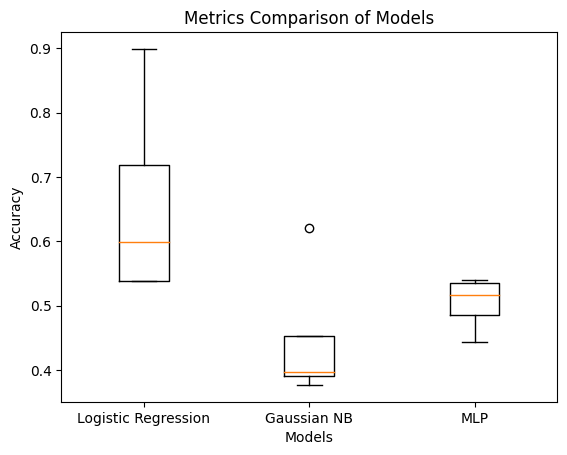

In [36]:
# Visualize accuracy scores
models = ['Logistic Regression', 'Gaussian NB', 'MLP']
accuracies = [
    [accuracy, precision, recall, f1],  # Logistic Regression accuracies
    [accuracy1, precision1, recall1, f11],  # Gaussian NB accuracies
    [accuracy2, precision2, recall2, f12]   # MLP accuracies
]
import matplotlib.pyplot as plt
plt.boxplot(accuracies, labels=models)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Metrics Comparison of Models')
# Display the plot
plt.show()

### Feature contribution to the model

In [37]:
print("Features contributing to the model:")
for i, class_label in enumerate(model.classes_):
    print(f"\nClass: {class_label}")
    print("Means:")
    class_means = x_train[y_train == class_label].mean().sort_values(ascending=False)
    print(class_means)  # Mean for each feature in this class
    print("Variances:")
    class_variances = x_train[y_train == class_label].var().sort_values(ascending=False)
    print(class_variances)  # Variance for each feature in this class

Features contributing to the model:

Class: Benign
Means:
OUT_BYTES                     4097.334126
IN_BYTES                      2628.715823
FLOW_DURATION_MILLISECONDS    1754.236267
L7_PROTO                        16.352832
TCP_FLAGS                       15.960698
PROTOCOL                         9.943368
IN_PKTS                          6.039642
OUT_PKTS                         5.737003
Label                            0.000000
dtype: float64
Variances:
OUT_BYTES                     4.510264e+09
IN_BYTES                      1.158994e+08
FLOW_DURATION_MILLISECONDS    1.067070e+08
OUT_PKTS                      2.460823e+03
L7_PROTO                      1.249792e+03
IN_PKTS                       6.474384e+02
TCP_FLAGS                     1.583799e+02
PROTOCOL                      2.850291e+01
Label                         0.000000e+00
dtype: float64

Class: ddos
Means:
OUT_BYTES                     2005.789134
IN_BYTES                       477.216332
FLOW_DURATION_MILLISECONDS     4

### Ablation Analysis

In [38]:
# Perform ablation analysis
removed_features = []
scores = []

for feature in X.columns:
    # Remove the current feature
    reduced_features = X.drop(feature, axis=1)

    x_train, x_test, y_train, y_test = train_test_split(reduced_features, y, test_size=0.1)

    # Train a new model without the feature
    model = LogisticRegression(random_state=0)
    model.fit(x_train, y_train)

    # Evaluate the model without the feature
    score = accuracy_score(y_test, model.predict(x_test))
    scores.append(score)

    # Store the removed feature
    removed_features.append(feature)

# Create a dataframe with results
results_df = pd.DataFrame({"Feature Removed": removed_features, "Accuracy Score": scores})

# Print the results
print("Ablation Analysis Results:")
print(results_df.to_string())

# Compare the original and reduced model performance
print("Reduced Model Accuracy Range:", min(scores), "-", max(scores))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Ablation Analysis Results:
              Feature Removed  Accuracy Score
0                    PROTOCOL        0.488483
1                    L7_PROTO        0.503424
2                    IN_BYTES        0.477692
3                   OUT_BYTES        0.500934
4                     IN_PKTS        0.491872
5                    OUT_PKTS        0.490627
6                   TCP_FLAGS        0.483849
7  FLOW_DURATION_MILLISECONDS        0.486477
8                       Label        0.501695
Reduced Model Accuracy Range: 0.4776924673168707 - 0.5034239468769455


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


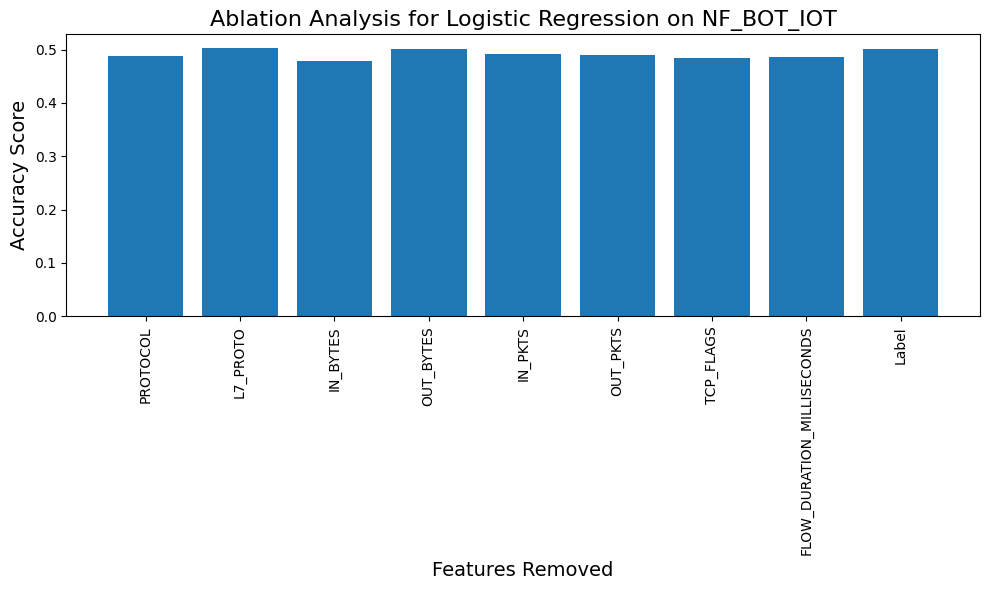

In [39]:
# Prepare data
features = results_df["Feature Removed"]
scores = results_df["Accuracy Score"]

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(features, scores)

# Add labels and title
plt.xlabel("Features Removed", fontsize=14)
plt.ylabel("Accuracy Score", fontsize=14)
plt.title("Ablation Analysis for Logistic Regression on NF_BOT_IOT", fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()